In [2]:
%matplotlib inline
import sys
import numpy as np
import pandas as pd
import geopandas as gpd
import torch
import xarray
import torchvision.models as models
from datetime import datetime

from datacube import Datacube
import matplotlib.pyplot as plt

sys.path.append("../scripts")
from dea_plotting import map_shapefile
from dea_spatialtools import xr_rasterize

In [3]:
dc = Datacube(app='First tries of modelling')

/env/lib/python3.6/site-packages/datacube/drivers/postgres/_connections.py:87: SADeprecationWarning: Calling URL() directly is deprecated and will be disabled in a future release.  The public constructor for URL is now the URL.create() method.
  username=username, password=password,


In [4]:
linescan_datasets = dc.find_datasets(product='linescan')
linescan_datasets = sorted(linescan_datasets, key = lambda ds: (ds.center_time, ds.id))

In [5]:
vector_file = 'resources/fire_boundaries.shp'
gdf = gpd.read_file(vector_file)

In [7]:
matches = pd.read_csv('matches2.csv')
print(matches.shape)

matches = matches[matches['good'] == 1]
matches.shape

(1551, 4)


(957, 4)

In [8]:
gdf.index = gdf['ID']
gdf.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            2249, 2250, 2251, 2252, 2253, 2254, 2255, 2256, 2257, 2258],
           dtype='int64', name='ID', length=976)

In [9]:
from PIL import Image

Working on 23...
Rasterizing to match xarray.DataArray dimensions (777, 1171)
(3, 777, 1171)


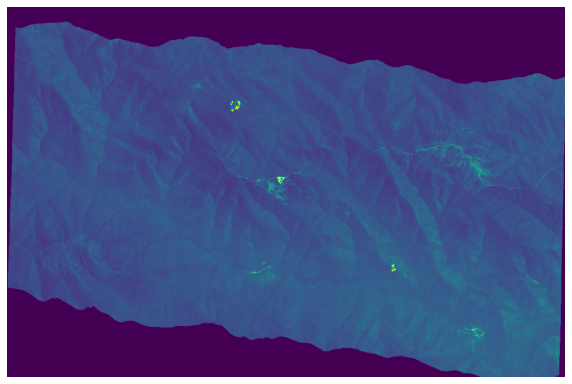

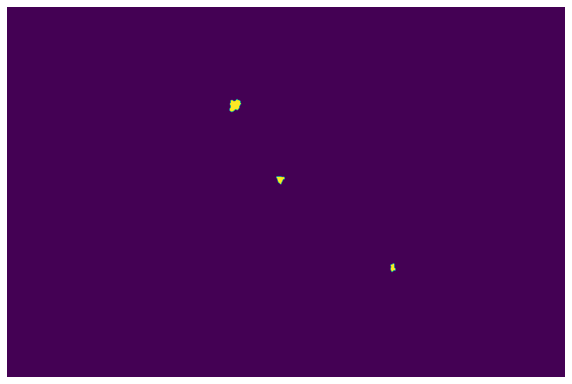

Working on 26...
Rasterizing to match xarray.DataArray dimensions (1297, 3333)
(3, 1297, 3333)


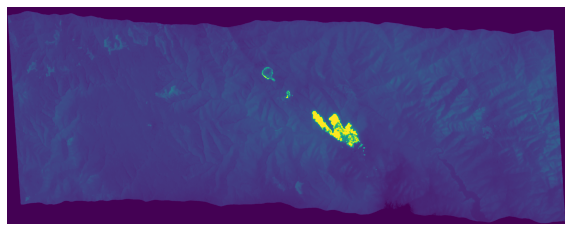

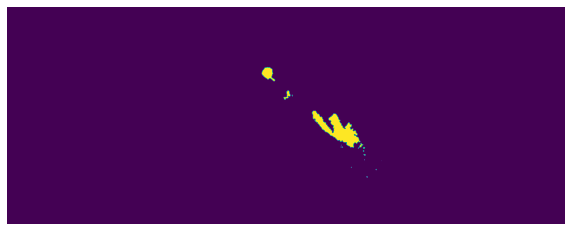

Working on 27...
Rasterizing to match xarray.DataArray dimensions (1873, 2125)
(3, 1873, 2125)


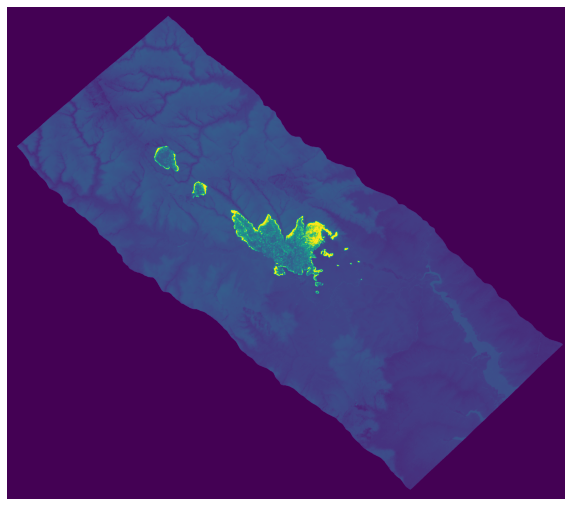

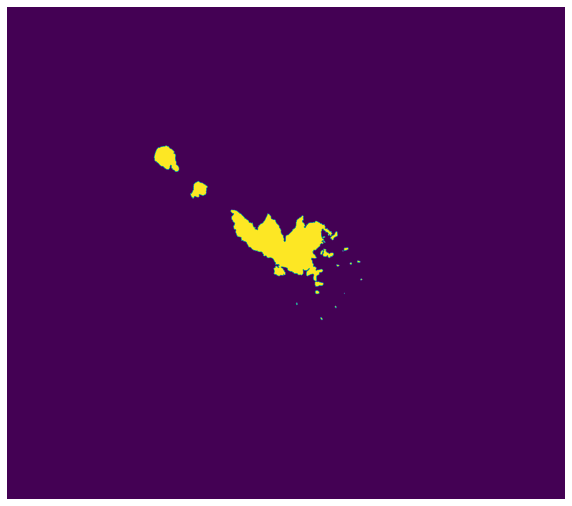

Working on 29...
Rasterizing to match xarray.DataArray dimensions (2052, 2196)
(3, 2052, 2196)


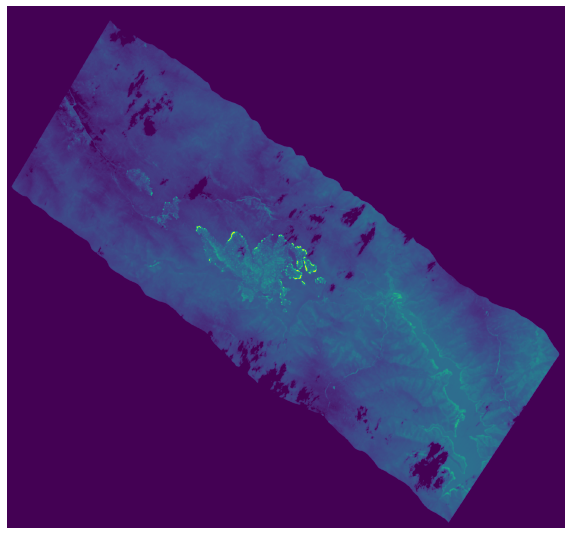

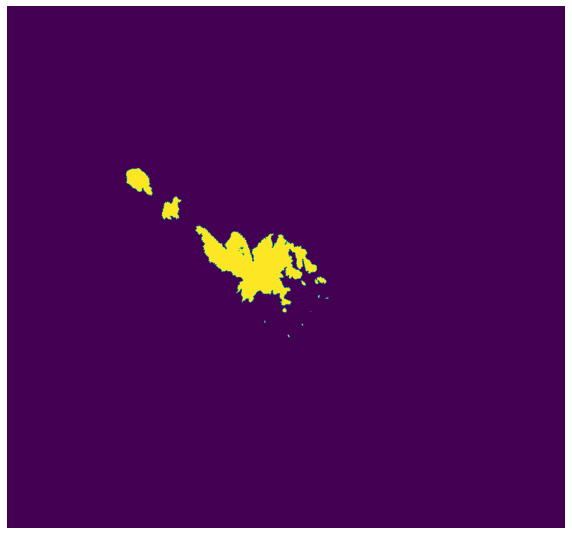

Working on 31...
Rasterizing to match xarray.DataArray dimensions (2022, 2435)
(3, 2022, 2435)


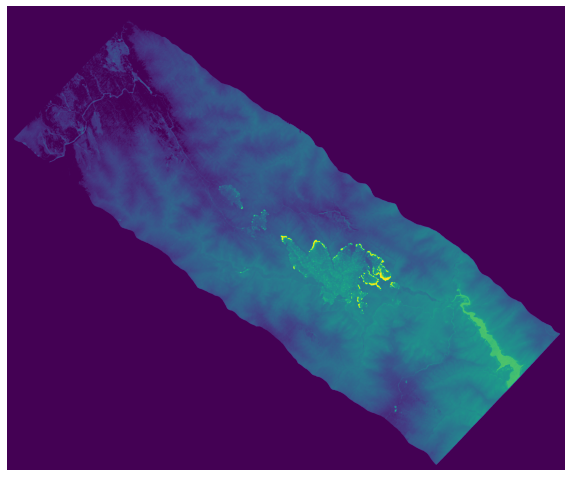

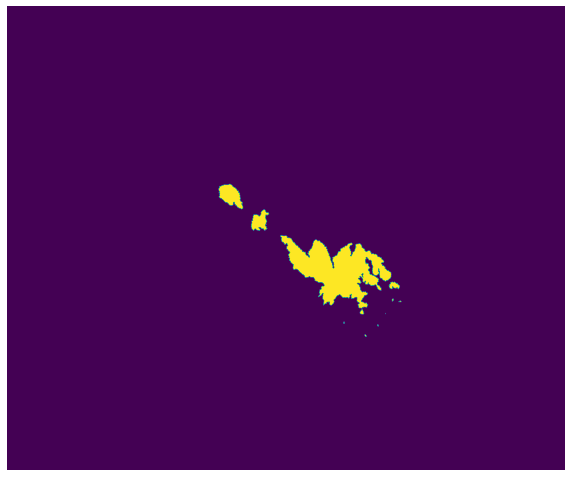

Working on 33...
Rasterizing to match xarray.DataArray dimensions (2295, 1799)
(3, 2295, 1799)


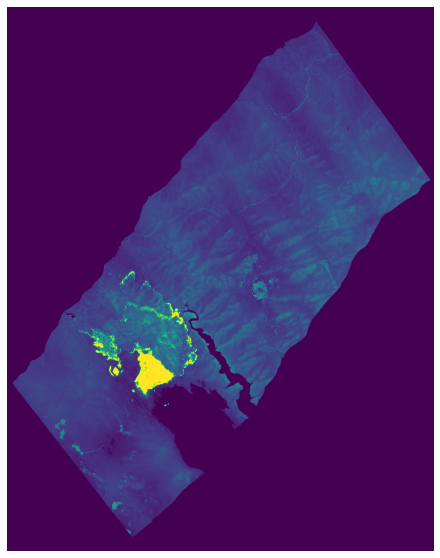

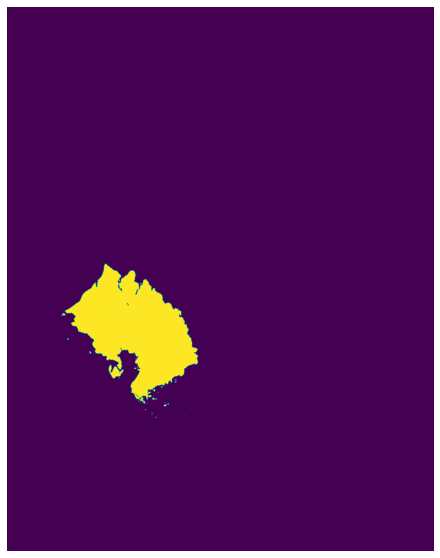

Working on 34...
Rasterizing to match xarray.DataArray dimensions (1908, 2142)
(3, 1908, 2142)


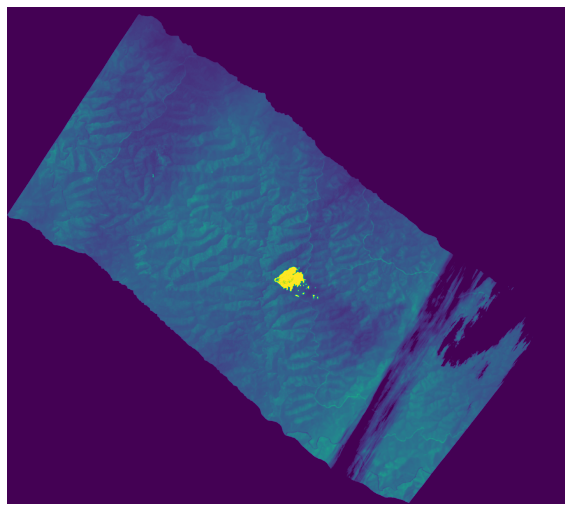

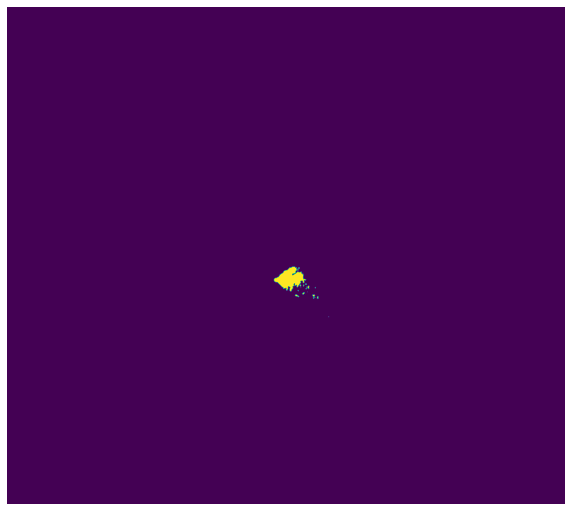

Working on 35...
Rasterizing to match xarray.DataArray dimensions (1963, 2224)
(3, 1963, 2224)


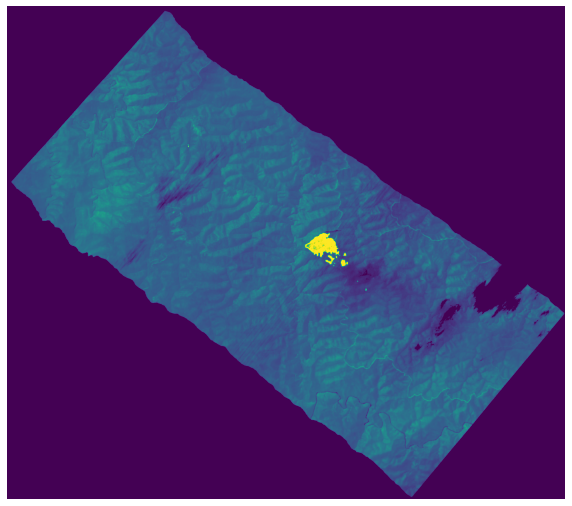

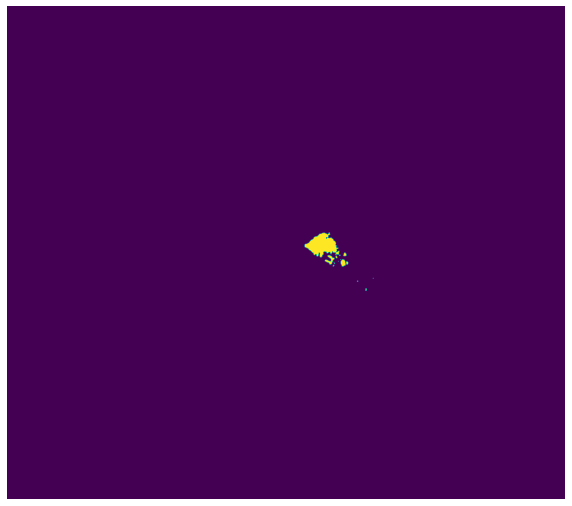

Working on 38...
Rasterizing to match xarray.DataArray dimensions (1753, 1934)
(3, 1753, 1934)


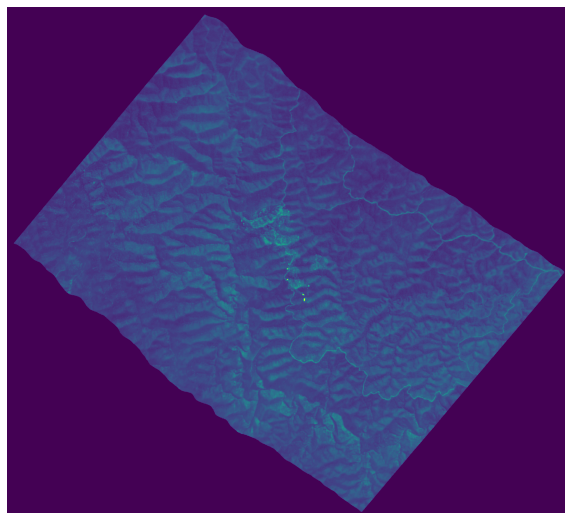

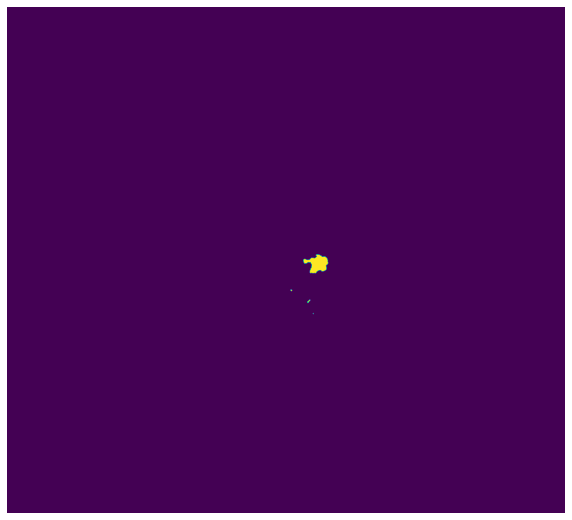

Working on 39...
Rasterizing to match xarray.DataArray dimensions (3314, 1683)
(3, 3314, 1683)


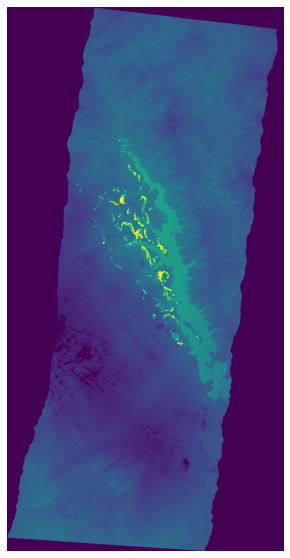

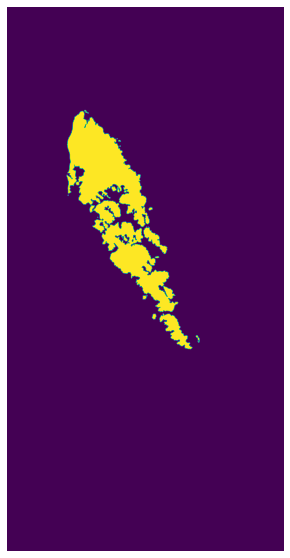

Working on 41...
Rasterizing to match xarray.DataArray dimensions (2440, 2132)
(3, 2440, 2132)


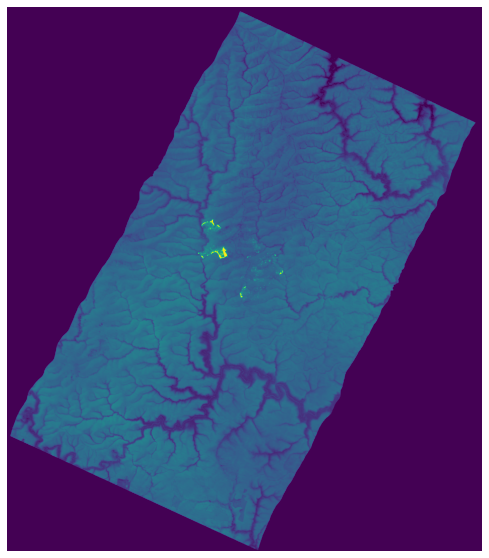

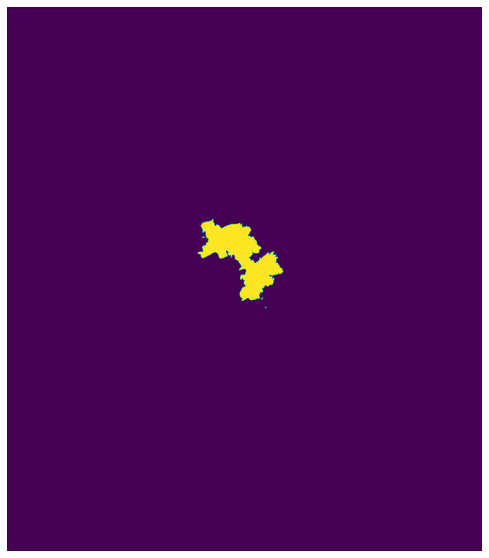

Working on 50...
Rasterizing to match xarray.DataArray dimensions (2847, 2720)
(3, 2847, 2720)


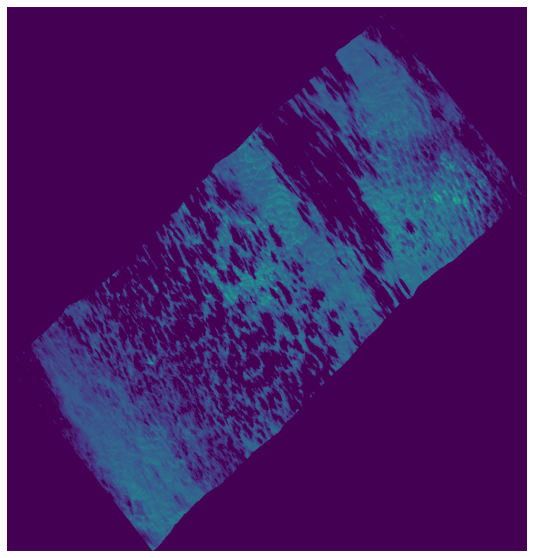

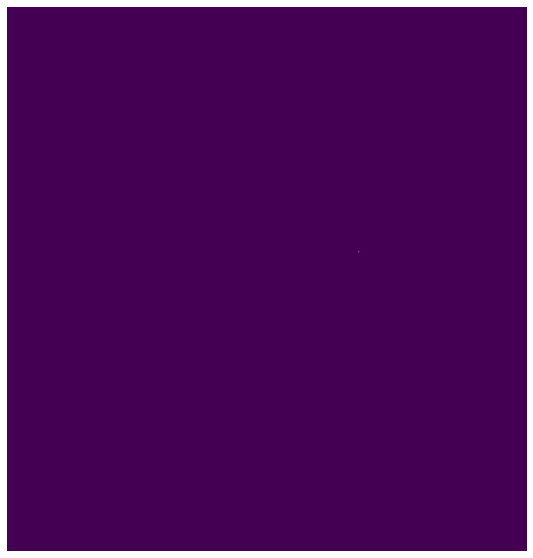

Working on 52...
Rasterizing to match xarray.DataArray dimensions (2792, 2645)
(3, 2792, 2645)


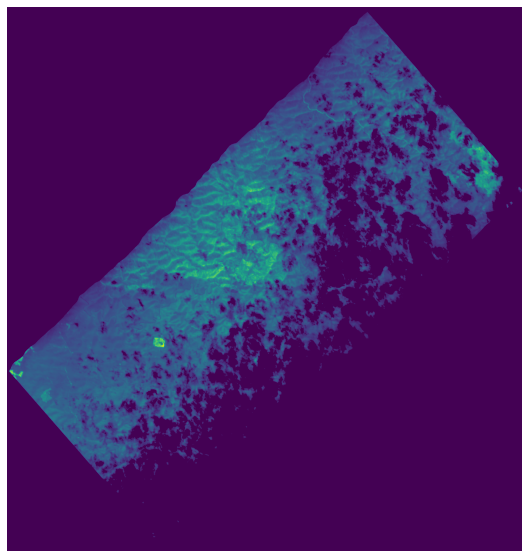

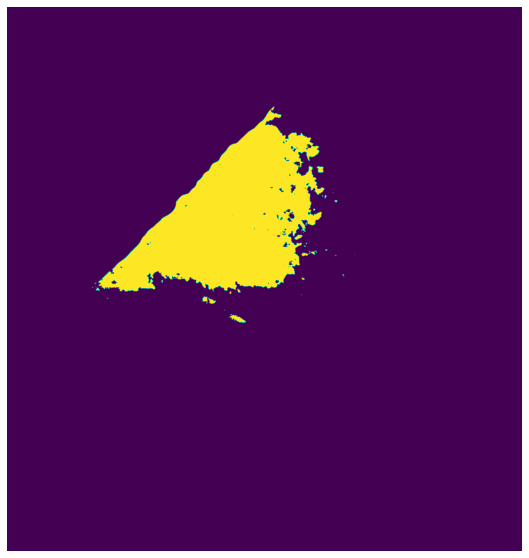

Working on 53...
Rasterizing to match xarray.DataArray dimensions (2818, 2951)
(3, 2818, 2951)


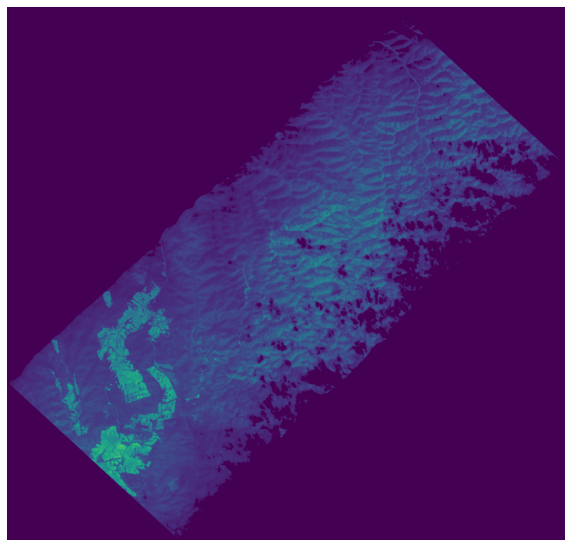

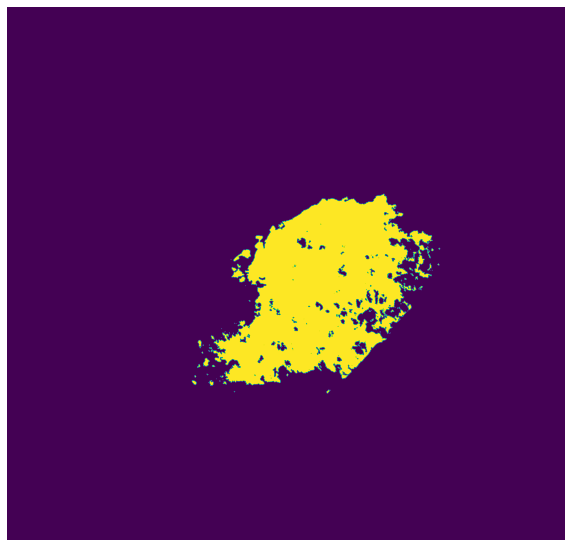

Working on 55...
Rasterizing to match xarray.DataArray dimensions (2580, 2399)
(3, 2580, 2399)


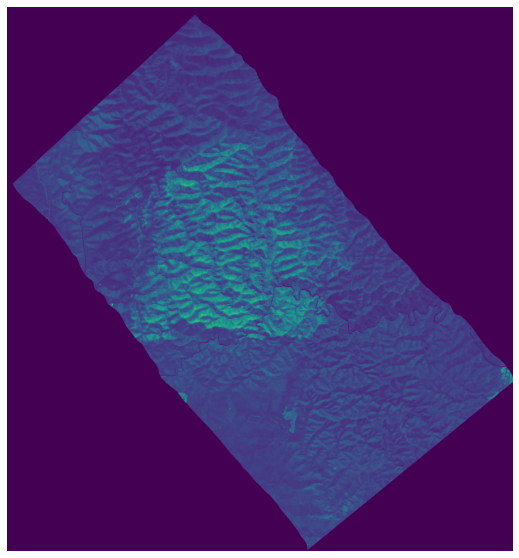

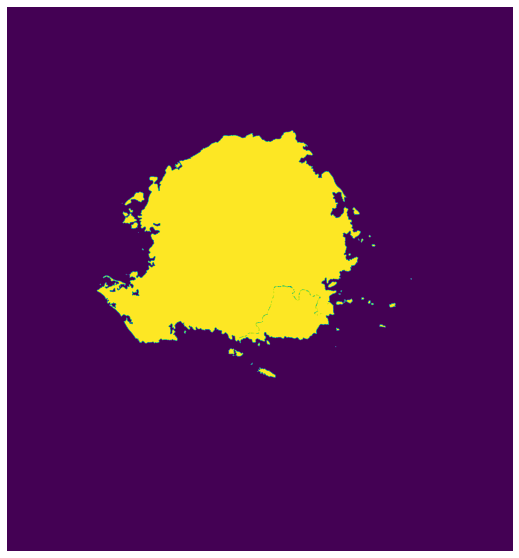

Working on 60...
Rasterizing to match xarray.DataArray dimensions (3347, 3684)
(3, 3347, 3684)


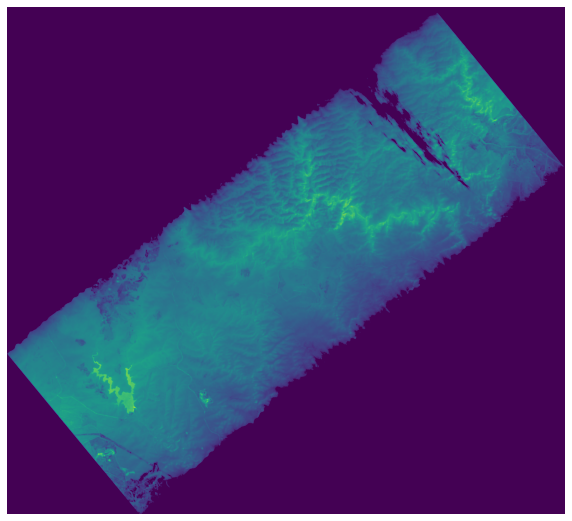

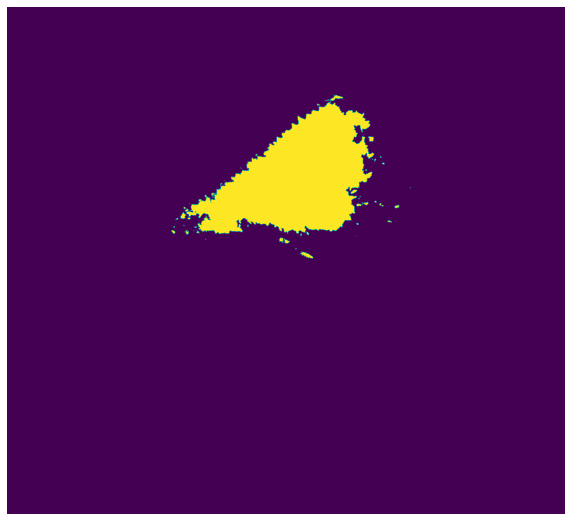

Working on 61...
Rasterizing to match xarray.DataArray dimensions (3366, 3783)
(3, 3366, 3783)


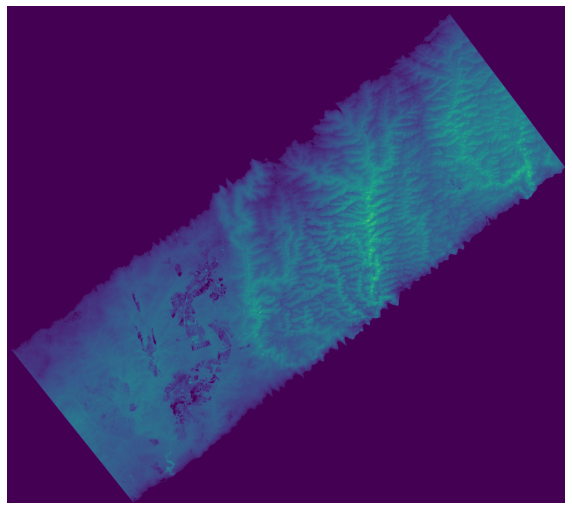

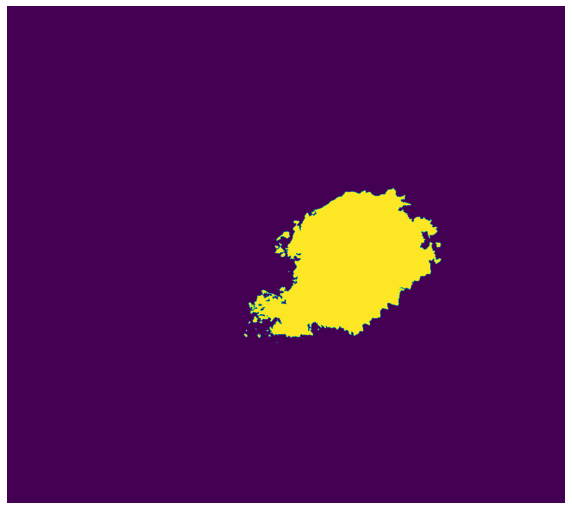

Working on 69...
Rasterizing to match xarray.DataArray dimensions (3981, 2973)
(3, 3981, 2973)


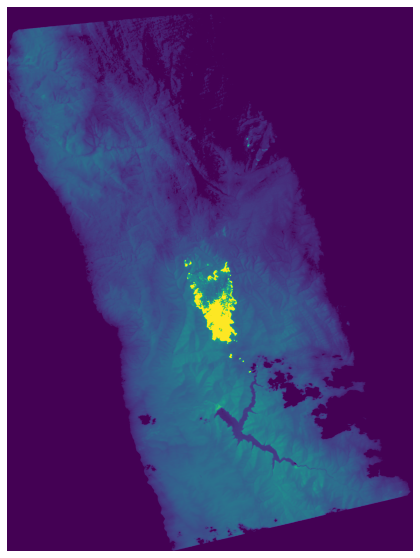

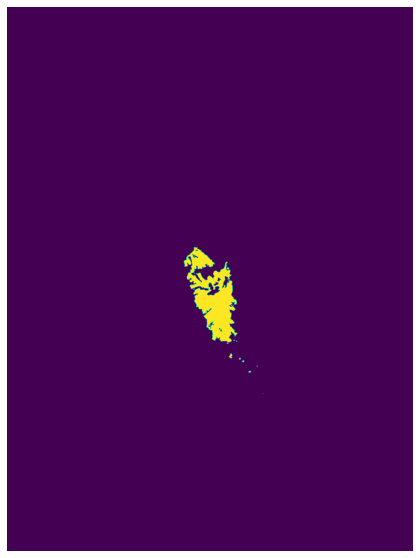

Working on 73...
Rasterizing to match xarray.DataArray dimensions (4124, 3915)
(3, 4124, 3915)


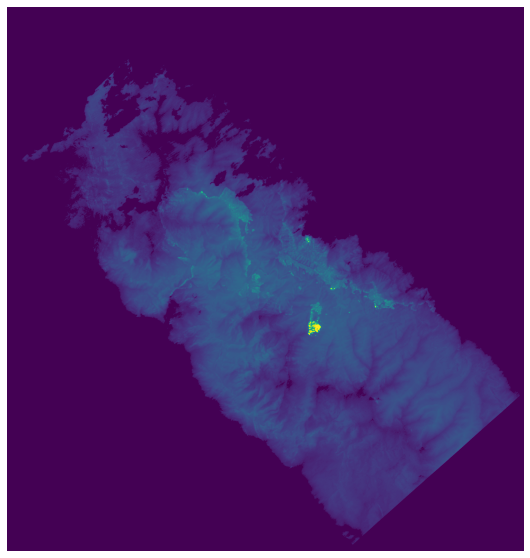

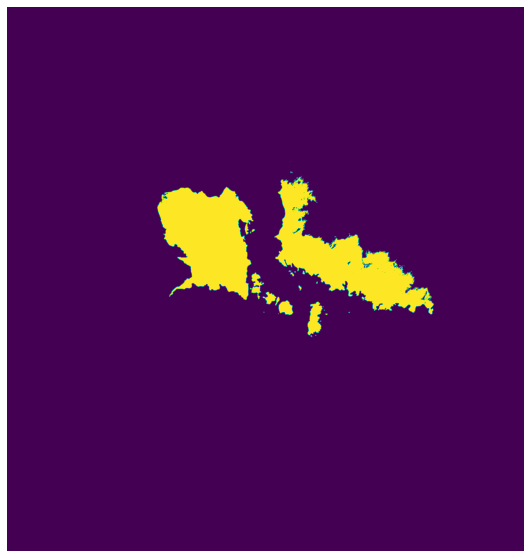

Working on 74...
Rasterizing to match xarray.DataArray dimensions (3531, 2005)
(3, 3531, 2005)


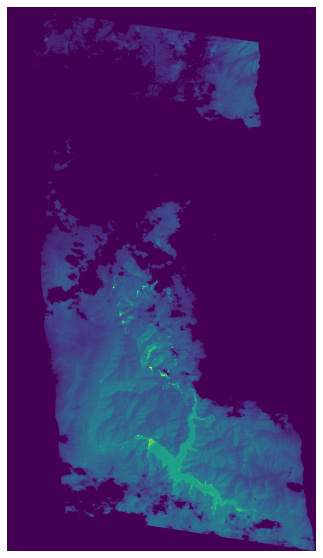

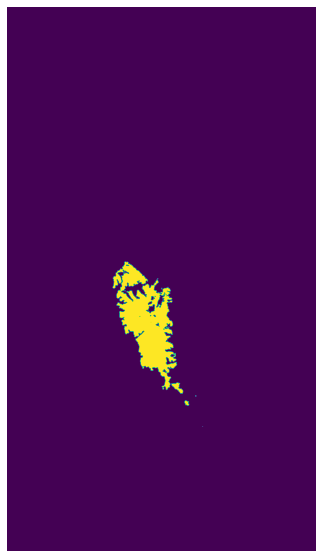

Working on 80...
Rasterizing to match xarray.DataArray dimensions (5321, 3249)
(3, 5321, 3249)


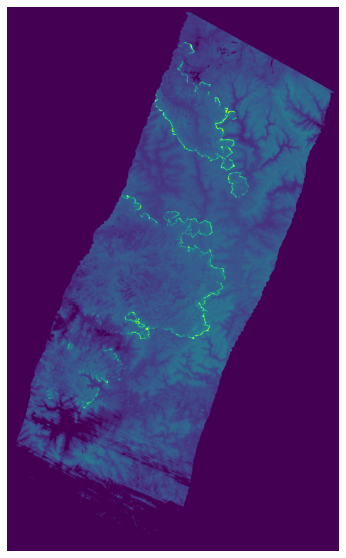

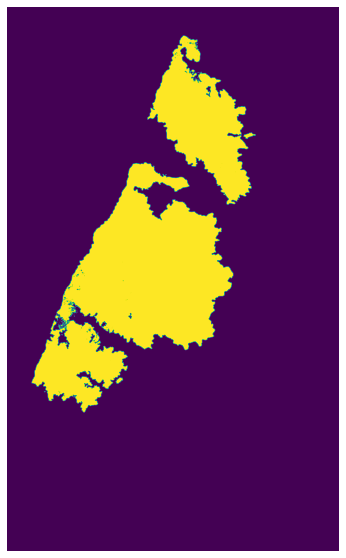

Working on 82...
Rasterizing to match xarray.DataArray dimensions (3075, 2637)
(3, 3075, 2637)


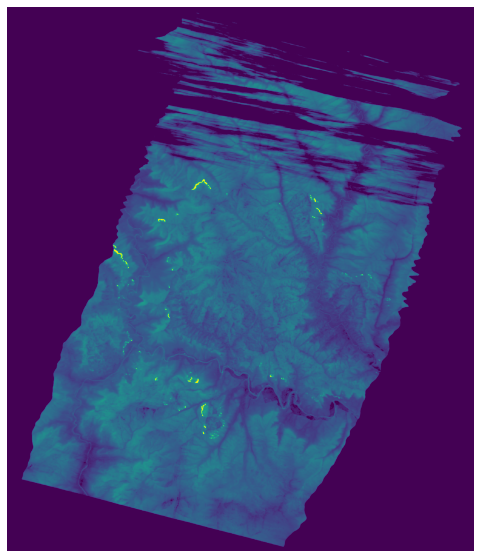

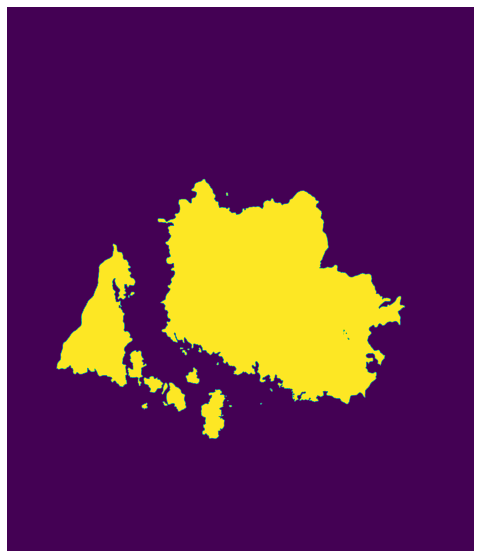

Working on 87...
Rasterizing to match xarray.DataArray dimensions (3313, 2770)
(3, 3313, 2770)


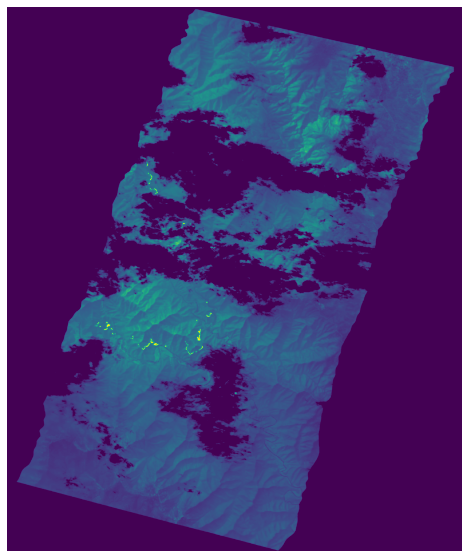

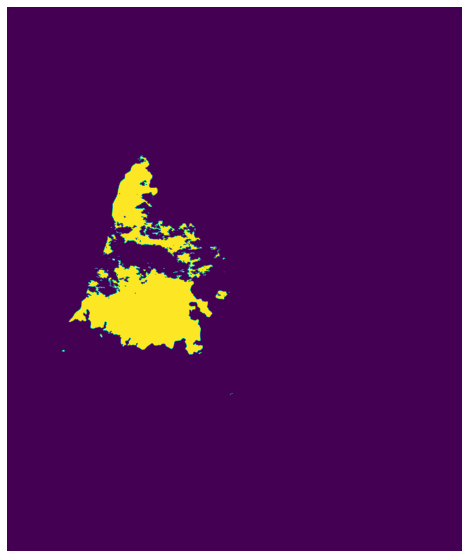

Working on 92...
Rasterizing to match xarray.DataArray dimensions (3164, 2068)
(3, 3164, 2068)


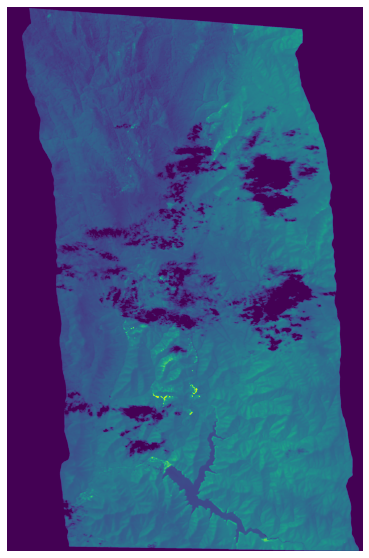

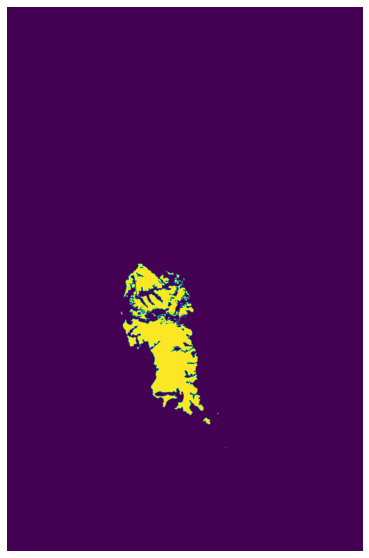

Working on 97...
Rasterizing to match xarray.DataArray dimensions (3416, 1878)
(3, 3416, 1878)


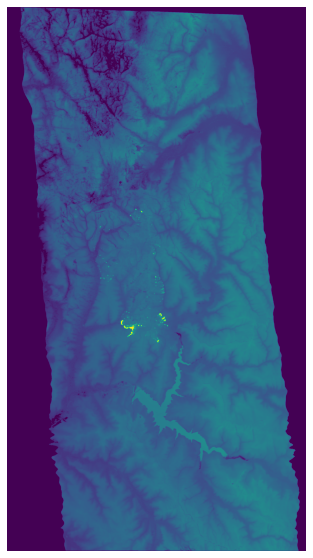

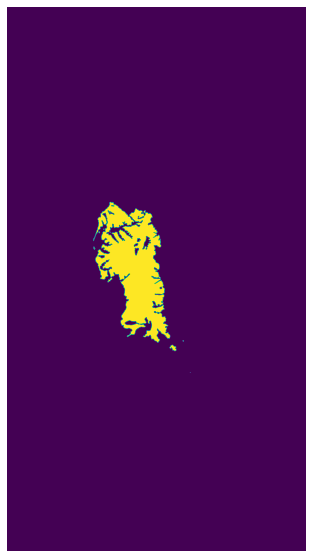

Working on 106...
Rasterizing to match xarray.DataArray dimensions (5821, 3195)
(3, 5821, 3195)


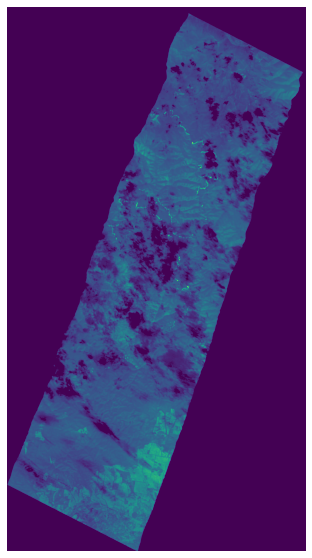

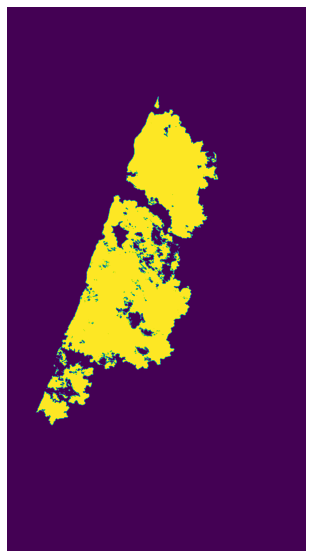

Working on 107...
Rasterizing to match xarray.DataArray dimensions (5300, 3263)
(3, 5300, 3263)


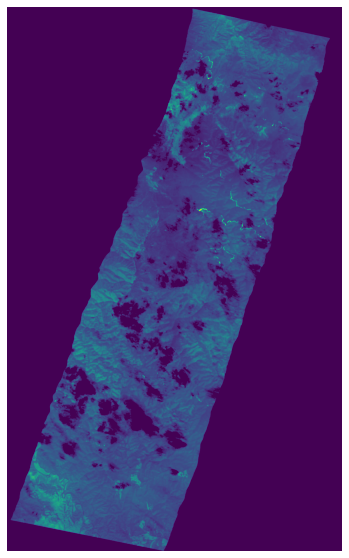

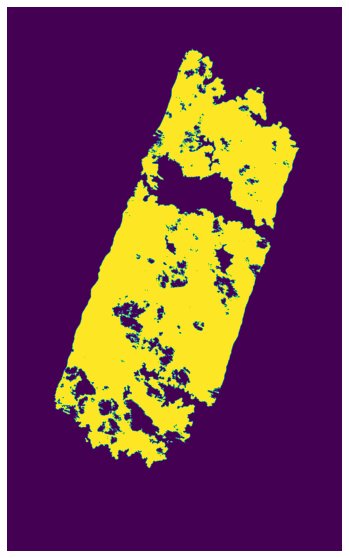

Working on 108...
Rasterizing to match xarray.DataArray dimensions (3049, 2434)
(3, 3049, 2434)


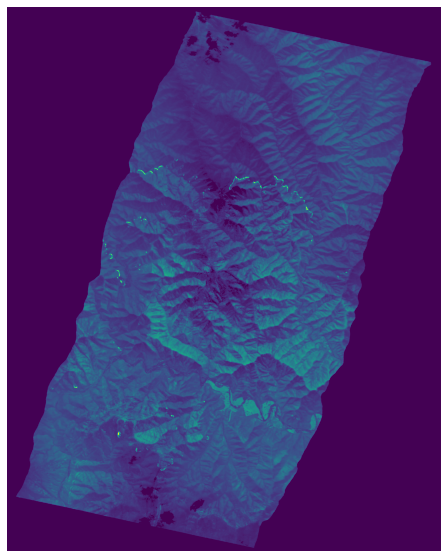

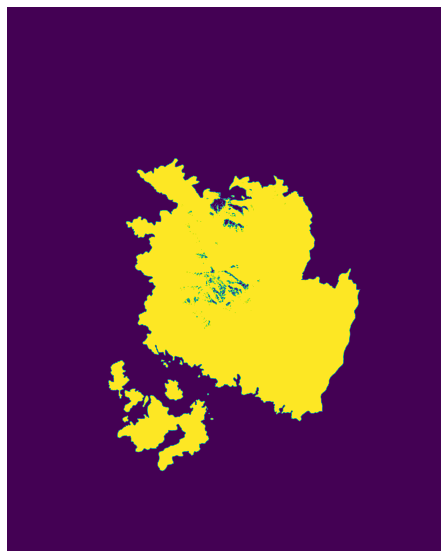

Working on 110...
Rasterizing to match xarray.DataArray dimensions (5660, 3086)
(3, 5660, 3086)


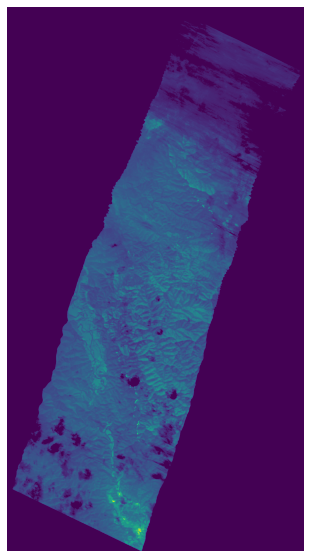

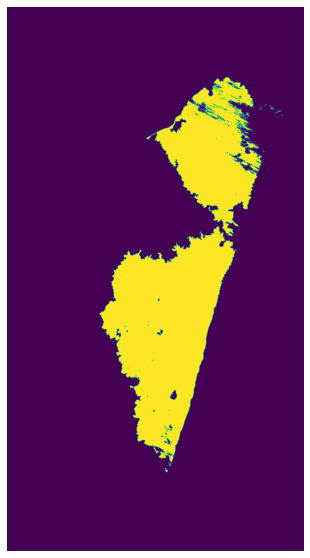

Working on 113...
Rasterizing to match xarray.DataArray dimensions (3266, 2371)
(3, 3266, 2371)


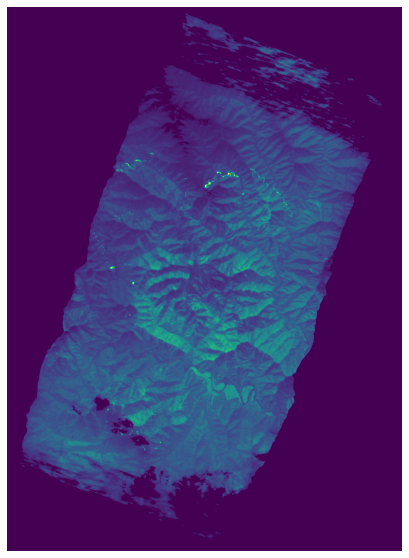

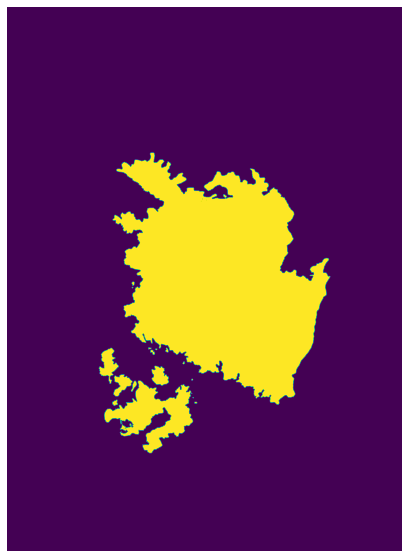

Working on 119...
Rasterizing to match xarray.DataArray dimensions (5275, 3305)
(3, 5275, 3305)


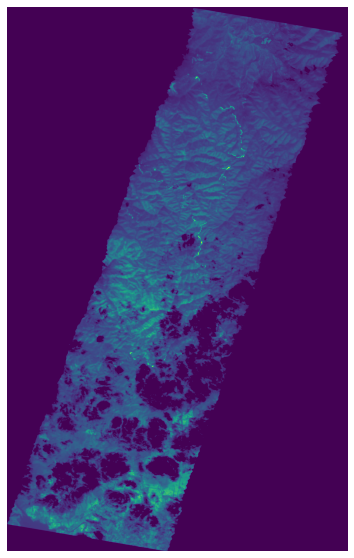

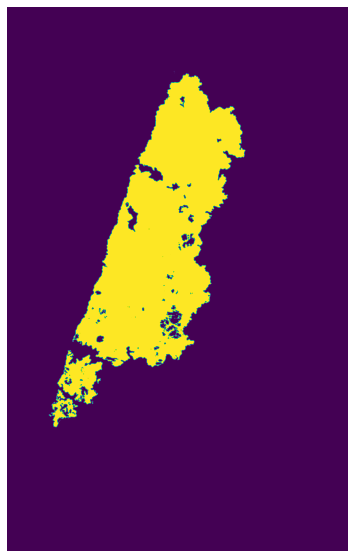

Working on 120...
Rasterizing to match xarray.DataArray dimensions (5867, 3133)
(3, 5867, 3133)


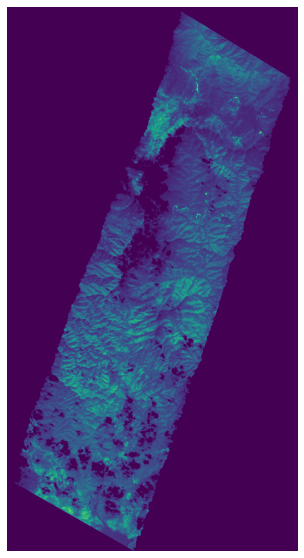

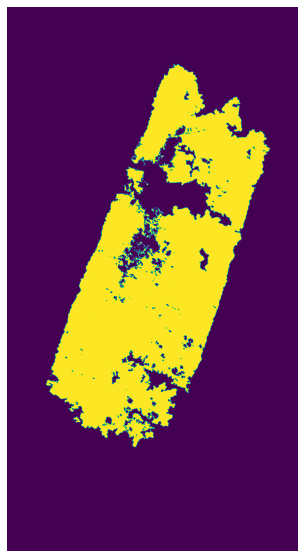

Working on 121...
Rasterizing to match xarray.DataArray dimensions (3483, 2252)
(3, 3483, 2252)


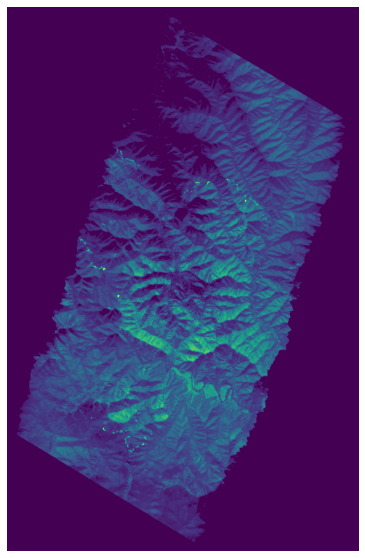

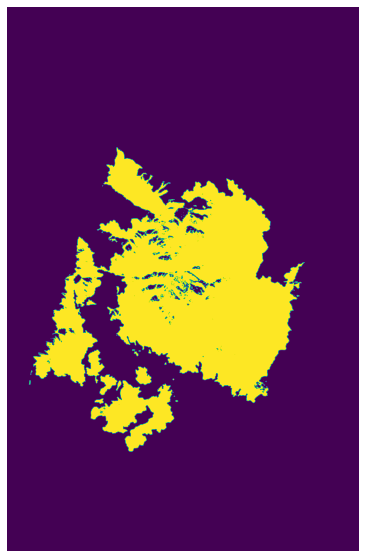

Working on 123...
Rasterizing to match xarray.DataArray dimensions (5255, 3327)
(3, 5255, 3327)


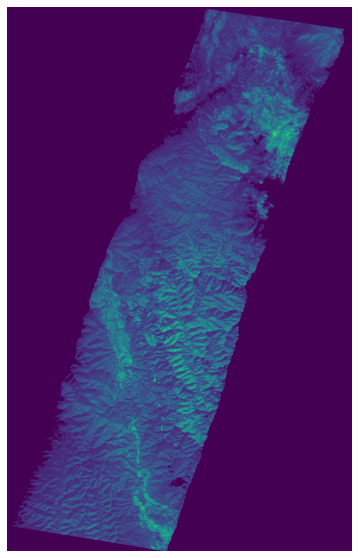

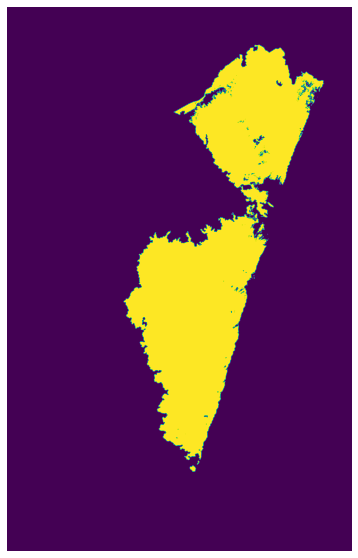

Working on 127...
Rasterizing to match xarray.DataArray dimensions (2706, 2357)
(3, 2706, 2357)


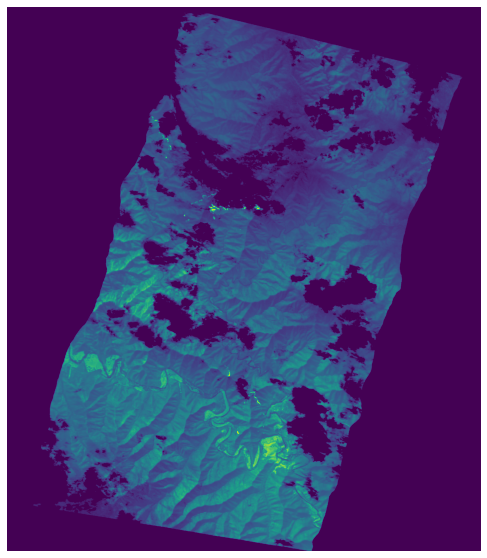

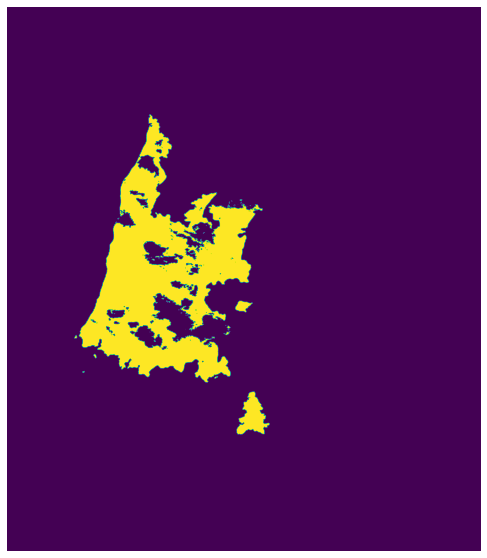

Working on 128...
Rasterizing to match xarray.DataArray dimensions (5355, 3357)
(3, 5355, 3357)


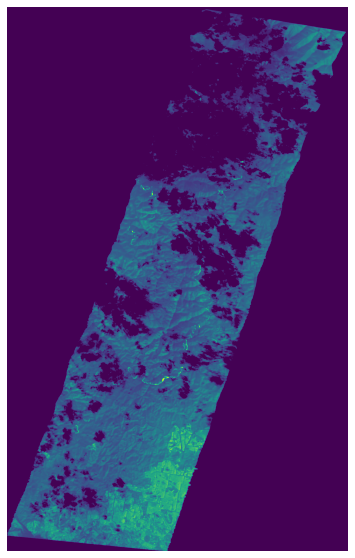

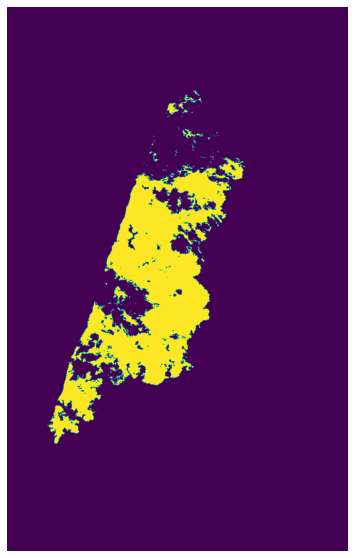

Working on 130...
Rasterizing to match xarray.DataArray dimensions (3305, 2314)
(3, 3305, 2314)


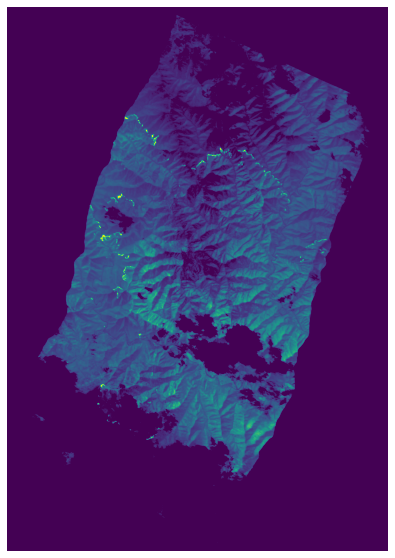

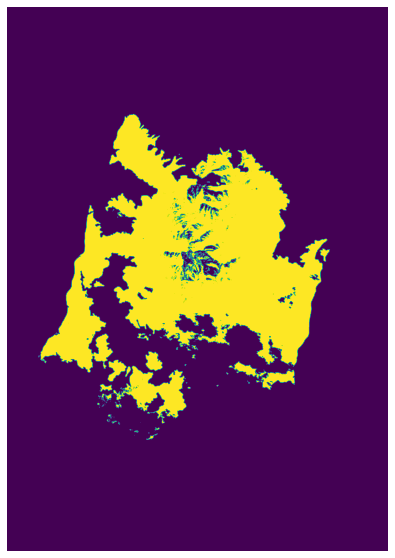

Working on 131...
Rasterizing to match xarray.DataArray dimensions (2703, 2290)
(3, 2703, 2290)


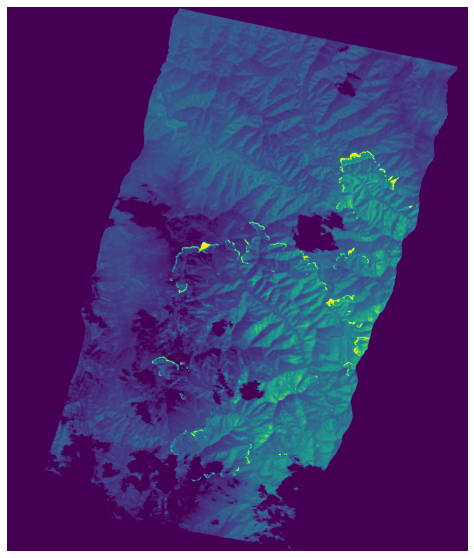

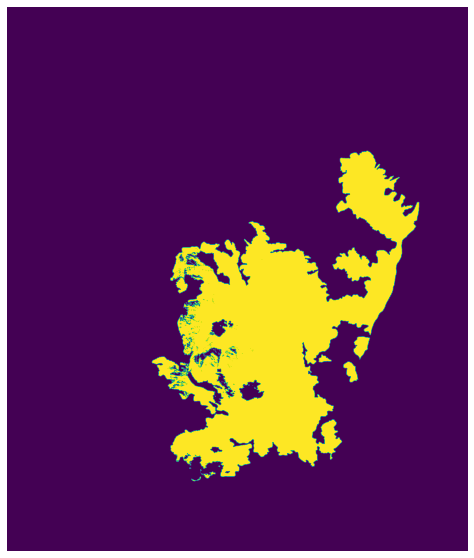

In [15]:
train_targets_regions = []
for k in range(134):
    if k not in set(matches['id_ls']):
        continue
    
    df = matches.loc[matches['id_ls'] == k]
    print(f'Working on {k}...')
    src = dc.load(
        product='linescan', 
        id=linescan_datasets[k].id, 
        output_crs='epsg:28355', 
        resolution=(-10,10)
    )

    region = gdf.loc[df['id_pl']]
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
    plt.axis('off')
    
    target = xr_rasterize(gdf=region, da=src)
    target.values[src.linescan.values[0] == 0] = 0
    train_targets_regions.append(target)
    ax.imshow(src.linescan[0, :, :])
    # region.geometry.exterior.plot(ax=ax, edgecolor='red', linewidths=1)
    # plt.gca().collections[-1].colorbar.remove()
    plt.title('')
    data = np.stack((
        np.array(src.linescan[0, :, :].data),
        np.array(src.linescan[0, :, :].data),
        np.array(src.linescan[0, :, :].data),
    ))
    print(data.shape)
    Image.fromarray(data.transpose(1, 2, 0)).save(f'data/imgs/linescan_{k}.png')
    plt.show()

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

    plt.axis('off')
    ax.imshow(train_targets_regions[-1])
    Image.fromarray(train_targets_regions[-1].data).save(f'data/masks/linescan_{k}.png')
    plt.show()

(777, 1171)


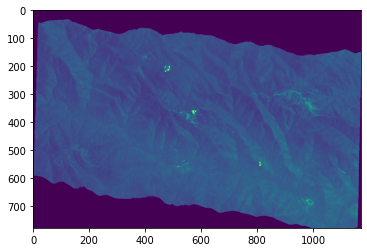

In [67]:
import imageio
from pathlib import Path

for k in [23]:
    im = imageio.imread(f'data/imgs/linescan_{k}.png')
    plt.imshow(im)
    print(im.shape)

# Test set

In [19]:
test = pd.read_csv('resources/challenge1_test.csv', index_col='id')
print(test.shape)
fnames = test.label.unique()
fnames

(5000, 6)


array(['JORDAN_235_P1_201901281204_MGA94_55',
       'JORDAN_294_P1_201902011150_MGA94_55',
       'WALHALLA_313_P1_201902020733_MGA94_55',
       'WALHALLA_353_P1_201902031625_MGA94_55',
       'MACALISTER91_648_P1_201903070444_MGA94_55'], dtype=object)

In [21]:
from datacube import Datacube
dc = Datacube(app='Model Training')

linescan_datasets = dc.find_datasets(product='linescan')
linescan_datasets = sorted(linescan_datasets, key = lambda ds: (ds.center_time, ds.id))

ls_labels = [
    linescan_datasets[k].metadata_doc['label'] for k in range(len(linescan_datasets))
]

test_df = pd.read_csv('resources/challenge1_test.csv', index_col='id')

test_ids_in_linescan_ds = [
    k for k in range(len(linescan_datasets)) if ls_labels[k] in test_df['label'].tolist()
]

test_ds_list = {
    k: dc.load(product='linescan',
                id=linescan_datasets[k].id,
                output_crs='epsg:28355',
                resolution=(-10,10))
        for k in test_ids_in_linescan_ds
}

/env/lib/python3.6/site-packages/datacube/drivers/postgres/_connections.py:87: SADeprecationWarning: Calling URL() directly is deprecated and will be disabled in a future release.  The public constructor for URL is now the URL.create() method.
  username=username, password=password,


In [22]:
for k in test_ids_in_linescan_ds:
    src = test_ds_list[k]
    data = np.stack((
        np.array(src.linescan[0, :, :].data),
        np.array(src.linescan[0, :, :].data),
        np.array(src.linescan[0, :, :].data),
    ))
    print(data.shape)
    Image.fromarray(data.transpose(1, 2, 0)).save(f'test/imgs/linescan_{k}.png')

(3, 2507, 2870)
(3, 2835, 3242)
(3, 1898, 2181)
(3, 2116, 2099)
(3, 3584, 2623)


# After training start this

In [60]:
import os

for k in test_ids_in_linescan_ds:
    os.system(f"python predict.py -i test/imgs/linescan_{k}.png -o test/masks/linescan_{k}.png -s 0.2")

In [63]:
for i, k in enumerate(test_ids_in_linescan_ds):
    print(i)
    current_data = test_ds_list[k]
    
    x_org, y_org = np.asarray(Image.open(f'test/imgs/linescan_{k}.png'))[:, :, 0].shape
    output = np.asarray(Image.open(f'test/masks/linescan_{k}.png'))
    print(x_org, y_org, output.shape)
    if x_org <= output.shape[0] and y_org <= output.shape[1]:
        output = output[:x_org, :y_org]
        output = output[None, :, :]
    else:
        canvas = np.zeros((x_org, y_org))
        canvas[:output.shape[0], :output.shape[1]] = output
        output = canvas[None, :, :]
    
    
    # Uncomment if masks should be cropped to "borders"
#     output = output_border_cropped
    
    mask = (output > 0).astype(np.uint8) # the mask
    mask_xarray = current_data.copy(data={'linescan': mask})
    
    for idx, ob in test_df[test_df.label == ls_labels[k]].iterrows():
        result_tf = mask_xarray.sel(x=ob.x, y=ob.y, method='nearest').linescan[0]
        result_10 = int(result_tf == True)
        test_df.loc[(test_df.label==ls_labels[k]) & (test_df.x==ob.x) & (test_df.y==ob.y), 'target'] = result_10

test_df.to_csv('challenge1_bartek_unet_100epoch_20210615_0901.csv', columns = ['target'])
test_df.target

0
2507 2870 (2507, 2872)
1
2835 3242 (2835, 3240)
2
1898 2181 (1898, 2183)
3
2116 2099 (2136, 2116)
4
3584 2623 (4897, 3584)


id
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4995    0.0
4996    0.0
4997    0.0
4998    0.0
4999    0.0
Name: target, Length: 5000, dtype: float64